# Inferential statistics II - Bootstrapping

## Introduction

In the previous frequentist mini-projects, you did frequentist calculations to perform inference from a sample of data. Such inference relies on theory largely developed from the 19th-Century onwards that is subject to certain assumptions or theoretical limits. These are fine if those assumptions hold for the particular case you're working on, and what you want to do has a known theoretical distribution (for example the mean of a sampling distribution that we looked at in the previous mini-project.)

In this mini-project, you'll use the same medical charge data you used in the frequentist inference mini-project, but this time you'll make inferences about the population using bootstrapping (ie. simulating repeated re-runs of an experiment.) If frequentism is about using assumptions and theoretical results to calculate what we expect to happen were an experiment to be run again and again and again, then bootstrapping is about using computing power to essentially re-run the sample draw again and again and again to see what actually happens.

## Prerequisites

While these exercises do not strictly depend on these concepts, we encourage you to complete the previous mini-projects before starting this one so that you can approach this assignment with a good understanding of frequentist concepts like:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

To complete mini-project, it's important that you first complete the bootstrap resources listed in this subunit, as they contain valuable information about how to calculate bootstrap replicates of summary statistics. Having an basic understanding of what confidence intervals and p-values are will also be helpful (we touch on them in this mini-project, but please speak to your mentor or conduct individual research if you'd like to learn more.) 

In [1]:
import pandas as pd
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt

## Medical charge data set

In [2]:
med_charges = pd.read_csv('data/insurance2.csv')

In [3]:
med_charges.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In the previous assignment, you used the frequentist approach to estimate the lower limit for the 95% confidence interval on the mean hospital charge. This approach relies on statistical theory that has been developed over the years and is also limited to statistics for which theoretical results on the sampling distribution exist. These results are remarkably useful and applicable much of the time and under a surprisingly wide range of conditions.

Having calculated the 95% lower confidence interval using frequentist theory in the previous exercise, you'll now use bootstrap inference to verify your calculations and check that you get consistent results without making the assumptions required before. After all, the distribution of charges really was very non-normal.

__Q:__ Use bootstrap sampling to estimate the same 95% confidence interval lower limit as before.

__A:__  12724.47

In [4]:
np.random.seed(47)
N_rep = 10000
# Initialize array to store bootstrap replicates
mean_charge_reps = np.empty(N_rep)
for i in range(N_rep):
    # Calculate bootstrap relicates for mean of patient charges. 
    mean_charge_reps[i] = np.mean(np.random.choice(med_charges.charges, len(med_charges.charges)))
# Calculate 5th percentile of bootstrap replicate mean patient charges. This is the lower limit of the one-tailed 95%
#    confidence interval. 
lower_ci = np.round(np.percentile(mean_charge_reps, 5), 2)
lower_ci

12724.47

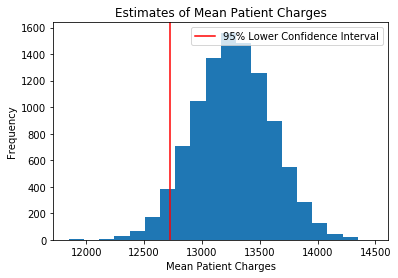

In [5]:
# Look at the distribution of bootstrap replicates to verify this result makes sense. 
plt.hist(mean_charge_reps, bins=20)
plt.axvline(lower_ci, color='red', label='95% Lower Confidence Interval')
plt.title('Estimates of Mean Patient Charges')
plt.xlabel('Mean Patient Charges')
plt.ylabel('Frequency')
plt.legend(loc='best')
plt.show()

If you performed 10000 replicates immediately after setting the random seed to 47, you should get the value 12724 here, which compares very well with the value 12725 obtained using the _t_-distribution confidence interval previously. It is a most pleasant result to see the predictions of classical frequentist theory match with results that are now possible through the number-crunching ability of computers.

Remember, in the previous mini-projects, we saw that there are two ways of performing a _t_-test from a sample, depending on whether we can assume the groups have equal variance or not. We can actually easily test this using the bootstrap approach!

__Q:__ Calculate the 95% confidence interval for the difference between the standard deviations of insurance and non-insurance claim charges (insured - non-insured). Calculate the differences over 10000 replicates. Plot the histogram of values and mark the locations of the percentiles. State the null and alternative hypothesis and comment on whether you would retain or reject the null hypothesis in this case and why.

__A:__  The difference in standard deviation between the two groups is 7599.42 with a 95% confidence interval of (6684.0, 8506.65). 

__Null hypothesis:__There is no difference between the standard deviations of insurance and non-insurance claim charges.   
__Alternative hypothesis:__ There is a difference between the standard deviations of insurance and non-insurance claim charges. 

__None__ of the 10,000 bootstrap replicates included a 0 difference, so we can reject the null hypothesis that there is no difference between the standard deviations of the groups and conclude that there is indeed a statistically significant difference. The difference is not just due to chance. 

In [6]:
# Separate the data into the two groups.
ins = med_charges[med_charges.insuranceclaim == 1]
noins = med_charges[med_charges.insuranceclaim == 0]

# Calculate difference in observed standard deviations. 
# Use Bessel's correction as we have a sample, not a population.
diff_std_obs = np.std(ins.charges, ddof=1) - np.std(noins.charges, ddof=1)
np.round(diff_std_obs, 2)

7599.42

In [7]:
# Calculate difference in standard deviations of bootstrap replicates of insurance claim charges and non-insurance 
#    claim charges. Put in a random seed so the answer will be consistent. 
n_reps = 10000
np.random.seed(47)
diff_std_reps = np.empty(n_reps)

ins_std_reps = np.empty(n_reps)
noins_std_reps = np.empty(n_reps)

for i in range(n_reps):
    # Create bootstrap replicates for standard deviation of insurance and non-insurance charges. 
    ins_std_reps[i] = np.std(np.random.choice(ins.charges, len(ins.charges)), ddof=1)
    noins_std_reps[i] = np.std(np.random.choice(noins.charges, len(noins.charges)), ddof=1)
    
# Calculate difference in standard deviations. 
diff_std_reps = ins_std_reps - noins_std_reps

# Calculate 95% confidence interval. 
conf_int_low, conf_int_high = np.percentile(diff_std_reps, [2.5, 97.5])
np.round(conf_int_low, 2), np.round(conf_int_high, 2)

(6684.0, 8506.65)

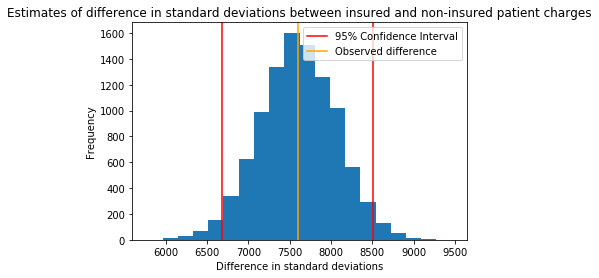

In [8]:
_ = plt.hist(diff_std_reps, bins=20)
_ = plt.axvline(conf_int_low, color='red', label='95% Confidence Interval')
_ = plt.axvline(conf_int_high, color='red')
_ = plt.axvline(diff_std_obs, color='orange', label='Observed difference')
_ = plt.title('Estimates of difference in standard deviations between insured and non-insured patient charges')
_ = plt.xlabel('Difference in standard deviations')
_ = plt.ylabel('Frequency')
_ = plt.legend(loc='best')
plt.show()
    

## Confidence interval and p-value

The confidence interval above is often a useful quantity to estimate. If we wish to limit our expected probability of making a Type I error (where we wrongly reject the null hypothesis, and it is, instead, true) to $\alpha$, the associated confidence interval is our estimate of the interval within which we expect the true population value to be found $100\times(1 - \alpha)$% of the time we do this test. In the above we performed bootstrap replicates to estimate the interval and reject the null hypothesis if this interval did not contain zero. You will sometimes see such an interval reported in the output of statistical functions.

The partner of the confidence interval is the p-value. The p-value and the confidence interval are linked through our choice of $\alpha$. The p-value tells us how likely it is, under the null hypothesis, to get an outcome at least as extreme as what was observed. If this fails to reach the level of our _pre-specified_ $\alpha$, we decide the null hypothesis is sufficiently unlikely to be true and thus reject it. To calculate this p-value via the bootstrap, we have to put ourselves in a position where we are simulating the null hypothesis being true and then calculate the fraction of times we observe a result at least as extreme as that actually observed.

Remember how, previously, you used the _t_-test to calculate the p-value for the observed difference between the means of insured and non-insured medical cases. We're now going to repeat this, this time using the bootstrap approach.

__Q:__ Perform a bootstrapped hypothesis test at the 5% significance level ($\alpha = 0.05$) to calculate the p-value of the observed difference between insurance and non-insurance charges, state your null and alternative hypotheses and whether you retain or reject the null hypothesis for the given significance level.

__A:__ __Null hypothesis:__ There is no difference in the mean values between insurance and non-insurance charges.  
__Alternative hypothesis:__ There is a significant difference in the mean values between insurance and non-insurance charges.  

P-value = 0.0 (still 0.0 at 1,000,000 replications); None of our bootstrap replicates had a difference in means at least as extreme as we observed in our data. We must therefore reject the null hypothesis and conclude there is a significant difference in the mean values between insurance and non-insurance patient charges.   
As the p-value is 0.0, it is certainly below our 0.05 significance level and once again, we conclude we must reject the null hypothesis and accept the alternative hypothesis. 

In [9]:
# Calculate difference in observed means. 

diff_means_obs = np.mean(ins.charges) - np.mean(noins.charges)
np.round(diff_means_obs, 2)

7602.51

In [10]:
# In order to test our null hypothesis that there is no difference between the mean values of the groups, we will shift
#     the mean of each group to the mean of the combined data to simulate our null hypothesis, then test to see if the 
#     difference of the means of the replicates of these groups with shifted means has any values at least as extreme 
#     as that which we observed in our original data. 
n_reps = 10000
diff_mean_reps = np.empty(n_reps)

ins_mean_reps = np.empty(n_reps)
noins_mean_reps = np.empty(n_reps)

combined_mean = np.mean(np.concatenate((ins.charges, noins.charges)))

# Shift means to combined mean to simulate the null hypothesis. 

ins_shifted = ins.charges - np.mean(ins.charges) + combined_mean
noins_shifted = noins.charges - np.mean(noins.charges) + combined_mean

for i in range(n_reps):
    # Create bootstrap replicates for shifted mean arrays of insurance and non-insurance charges. 
    ins_mean_reps[i] = np.mean(np.random.choice(ins_shifted, len(ins_shifted)))
    noins_mean_reps[i] = np.mean(np.random.choice(noins_shifted, len(noins_shifted)))
    
# Calculate difference in means of shifted arrays. 
diff_mean_reps = ins_mean_reps - noins_mean_reps

# Calculate p-value of test. What proportion of replicates had a difference in mean at least as extreme as observation?
p_value = np.sum(diff_mean_reps >= diff_means_obs) / len(diff_mean_reps)
p_value

0.0

In [11]:
# Is p-value < alpha?
p_value < 0.05

True

In [12]:
# Bootstrap again to check difference of means crossing zero to see if we get the same result. Also calculate 95%
#    confidence interval. Specify a random seed so answer will be consistent. 
# Calculate difference in means of bootstrap replicates of insurance claim charges and non-insurance claim charges. 
n_reps = 10000
np.random.seed(47)
diff_mean_reps2 = np.empty(n_reps)

ins_mean_reps2 = np.empty(n_reps)
noins_mean_reps2 = np.empty(n_reps)

for i in range(n_reps):
    # Create bootstrap replicates for means of insurance and non-insurance charges. 
    ins_mean_reps2[i] = np.mean(np.random.choice(ins.charges, len(ins.charges)))
    noins_mean_reps2[i] = np.mean(np.random.choice(noins.charges, len(noins.charges)))
    
# Calculate difference in means. 
diff_mean_reps2 = ins_mean_reps2 - noins_mean_reps2

# Calculate 95% confidence interval. 
conf_int_low_mean, conf_int_high_mean = np.percentile(diff_mean_reps2, [2.5, 97.5])
np.round(conf_int_low_mean, 2), np.round(conf_int_high_mean, 2)

(6500.34, 8734.13)

In [13]:
# Calculate p-value of this result including zero. 
p_value2 = np.sum(diff_mean_reps2 <= 0) / len(diff_mean_reps)
p_value2

0.0

__Q:__ To put the above result in perspective, plot the histogram of your bootstrapped differences along with lines marking the locations of the observed difference. (Why would we plot more than one line, given that we only have one observed difference?)

__A:__ We need to plot confidence intervals around our reported mean as it is not from a population, but a sample. The confidence intervals around that sample mean help us communicate what the real population value could be. 

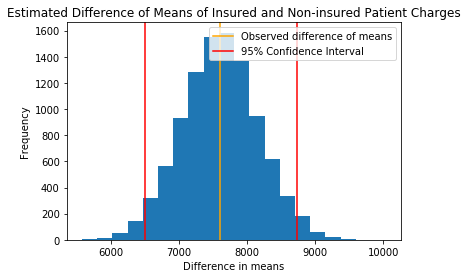

In [15]:
plt.hist(diff_mean_reps2, bins=20)
plt.axvline(diff_means_obs, color='orange', label='Observed difference of means')
plt.axvline(conf_int_low_mean, color='red', label='95% Confidence Interval')
plt.axvline(conf_int_high_mean, color='red')
plt.legend(loc='best')
plt.title('Estimated Difference of Means of Insured and Non-insured Patient Charges')
plt.xlabel('Difference in means')
plt.ylabel('Frequency')
plt.show()

__Q:__ Compare your p-value above with that obtained using the _t_-test function in the previous assignment. Do you think you would want to try to perform enough bootstrap replicates to observe a random difference as large as that we did observe?

__A:__ I tried 1,000,000 replicates - p-value was still 0.0, so no replicates were as large as observed difference. Calculated p-value from t-test function with unequal variances was 1.1105103216309125e-37. I don't have a powerful enough computer to run 10,000,000,000,000,000,000,000,000,000,000,000,000 tests to get 1 replicate with at least as large a difference in mean as our observation! So, no, I do not want to try that!

__Q:__ Consider the two variants of the _t_-test we performed in the previous assignment. Which one would you use now?

__A:__ I would use the t-test with the unequal variances as we have determined that the groups have different standard deviations, so their variances are also different. 

__Q:__ If, instead of being asked whether the means of two groups were different, you were working with an ad-recommender team who wanted to release a new recommendation algorithm, and you were looking at click-through rate both for the current algorithm (call it A) and from trials of their new algorithm (call it B), would you perform a two-sided test as above? What would be your null and alternative hypotheses and what would be the real-world consequence of rejecting the null hypothesis?

__A:__ I would use a one-sided test as we want to know if B is better than A. We're only interested in one direction. If B is worse than A, our course of action is the same as if it is the same as A. We do nothing and leave algorithm A in place. 


Null hypothesis would be the click-through rates for B are less than or equal to A. 

Alternative hypothesis would be the click-through rates for B are higher than A.  

The real world consequence of rejecting the null hypothesis would be that we would conclude the new algorithm made a statistically significant difference. We would still need to check whether that difference was large enough to justify taking action - for instance, did algorithm B add enough click-throughs to justify the expense of putting it into production? 

# Learning outcomes

You've previously applied frequentist methods to calculate confidence intervals, p-values, and perform hypothesis tests. Frequentist methods use theoretical results to calculate what we expect would happen if experiments were to be run again and again and again. Now you've seen how you can do the same things using the bootstrap approach, which does not rely on such theory, and attendant assumptions, but instead literally does run experiments again and again and again.

In these exercises, you have:
* calculated the same confidence interval lower limit as you did previously
* tested the assumption that the variances of the two groups (insured vs. non-insured) were equal - something a bit harder to do using the frequentist method because of the nature of the sampling distribution for variance
* calculated the p-value for the difference between the means of the two groups and compared with the result obtained using the previous frequentist approach

You are now well equipped to apply the bootstrap approach to a wide variety of problems. Just think about what conditions you wish to recreate in your simulated reruns.